## Régression 

In [2]:
# import

import matplotlib.pyplot as plt

import numpy as np
np.random.seed(42)

import pickle


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import KFold 


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [3]:
taille_fenetre_to_run = 50
taille_stride_to_run = 10

In [4]:
data = pickle.load(open(f"Data/donnees_{taille_fenetre_to_run}w_{taille_stride_to_run}s.pkl", "rb"))

In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),  # Alpha peut être ajusté
    "Lasso Regression": Lasso(alpha=0.1, random_state=42),  # Alpha peut être ajusté
    "Elastic Net Regression": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # Alpha et l1_ratio ajustables
}

In [6]:
X_np_binary = data["X_np_binary"] # label pourrait introduire un biais
y_np = data["y_np"]
X_np_binary.shape

(9240, 368)

In [7]:
features_binary = data["features_names_binary"]

In [8]:
n_splits = 5
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True) 

results = {model_name: {'MSE': [], 'MAE': [], 'RMSE': [], 'MAPE': []} for model_name in models.keys()}


In [9]:
for model_name, model in models.items():
    print(f"Training and evaluating model: {model_name}")
    fold = 0
    for train_index, test_index in kf.split(X_np_binary):
        print(f"Fold: {fold}/{n_splits}")

        X_train, X_test = X_np_binary[train_index], X_np_binary[test_index]
        y_train, y_test = y_np[train_index], y_np[test_index]
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        results[model_name]['MSE'].append(mean_squared_error(y_test, y_pred))
        results[model_name]['MAE'].append(mean_absolute_error(y_test, y_pred))
        results[model_name]['RMSE'].append(root_mean_squared_error(y_test, y_pred))
        results[model_name]['MAPE'].append(mean_absolute_percentage_error(y_test, y_pred))

        filename = f"Models/{model_name}_{taille_fenetre_to_run}w_{taille_stride_to_run}s_{fold}fold.pkl"
        pickle.dump(model, open(filename, "wb"))

        fold += 1

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_values in metrics.items():
        print(f"{metric_name}: {np.mean(metric_values)}")

Training and evaluating model: Linear Regression
Fold: 0/5
Fold: 1/5
Fold: 2/5
Fold: 3/5
Fold: 4/5
Training and evaluating model: Ridge Regression
Fold: 0/5
Fold: 1/5
Fold: 2/5
Fold: 3/5
Fold: 4/5
Training and evaluating model: Lasso Regression
Fold: 0/5
Fold: 1/5
Fold: 2/5
Fold: 3/5
Fold: 4/5
Training and evaluating model: Elastic Net Regression
Fold: 0/5
Fold: 1/5
Fold: 2/5
Fold: 3/5
Fold: 4/5
Model: Linear Regression
MSE: 3.28749919605441
MAE: 0.43617819174236877
RMSE: 1.535918252689962
MAPE: 0.00464676614408746
Model: Ridge Regression
MSE: 0.29579455479043126
MAE: 0.390148446122558
RMSE: 0.5426490449689598
MAPE: 0.00409710874170479
Model: Lasso Regression
MSE: 0.8949032010207849
MAE: 0.692852932556869
RMSE: 0.9454673628811353
MAPE: 0.007422811587634639
Model: Elastic Net Regression
MSE: 0.988576549953345
MAE: 0.6962051255211246
RMSE: 0.9937467970856739
MAPE: 0.0074642256087040365


In [10]:
# # output 

# Model: Linear Regression
# MSE: 3.28749919605441
# MAE: 0.43617819174236877
# RMSE: 1.535918252689962
# MAPE: 0.00464676614408746

# Model: Ridge Regression
# MSE: 0.29579455479043126
# MAE: 0.390148446122558
# RMSE: 0.5426490449689598
# MAPE: 0.00409710874170479

# Model: Lasso Regression
# MSE: 0.8949032010207849
# MAE: 0.692852932556869
# RMSE: 0.9454673628811353
# MAPE: 0.007422811587634639

# Model: Elastic Net Regression
# MSE: 0.988576549953345
# MAE: 0.6962051255211246
# RMSE: 0.9937467970856739
# MAPE: 0.0074642256087040365

In [11]:
# # TODO : faire un grid search pour trouver les meilleurs hyperparamètres
# # C'EST TRES RAPIDE A ENTRAINER DONC OKLM 

# CODE BROUILLON : 

# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
# import numpy as np

# # Configurations
# n_splits = 5
# kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

# # Dataset (supposons que X_np_label et y_np sont déjà définis)
# X = X_np_label
# y = y_np

# # Scorer personnalisé pour évaluer les modèles
# scoring = {
#     "MSE": make_scorer(mean_squared_error, greater_is_better=False),
#     "MAE": make_scorer(mean_absolute_error, greater_is_better=False)
# }

# # Modèles et grilles d'hyperparamètres
# param_grids = {
#     "Linear Regression": {
#         "fit_intercept": [True, False]
#     },
#     "Ridge Regression": {
#         "alpha": [0.1, 1.0, 10.0, 100.0],
#         "fit_intercept": [True, False]
#     },
#     "Lasso Regression": {
#         "alpha": [0.01, 0.1, 1.0, 10.0],
#         "fit_intercept": [True, False]
#     },
#     "Elastic Net Regression": {
#         "alpha": [0.01, 0.1, 1.0, 10.0],
#         "l1_ratio": [0.1, 0.5, 0.9],
#         "fit_intercept": [True, False]
#     }
# }

# # Résultats des GridSearch
# results = {}

# # Effectuer le GridSearch pour chaque modèle
# for model_name, param_grid in param_grids.items():
#     print(f"Performing GridSearch for {model_name}...")
    
#     if model_name == "Linear Regression":
#         model = LinearRegression()
#     elif model_name == "Ridge Regression":
#         model = Ridge(random_state=42)
#     elif model_name == "Lasso Regression":
#         model = Lasso(random_state=42)
#     elif model_name == "Elastic Net Regression":
#         model = ElasticNet(random_state=42)
    
#     # GridSearchCV
#     grid_search = GridSearchCV(
#         estimator=model,
#         param_grid=param_grid,
#         scoring="neg_mean_squared_error",  # Utilisation de MSE comme critère principal
#         cv=kf,
#         verbose=2,
#         n_jobs=-1
#     )
    
#     # Entraîner avec GridSearch
#     grid_search.fit(X, y)
    
#     # Stocker les résultats
#     results[model_name] = {
#         "Best Params": grid_search.best_params_,
#         "Best Score (MSE)": -grid_search.best_score_,  # Revenir à une valeur positive pour MSE
#         "Best Estimator": grid_search.best_estimator_
#     }

# # Afficher les meilleurs hyperparamètres pour chaque modèle
# for model_name, res in results.items():
#     print(f"\n{model_name}:")
#     print(f"  Best Params: {res['Best Params']}")
#     print(f"  Best Score (MSE): {res['Best Score (MSE)']:.6f}")


In [12]:
# pour chaque modèle meilleur fold pour chaque metrics

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_values in metrics.items():
        # get the best fold
        best_fold = np.argmin(metric_values)
        print(f"Best Fold: {best_fold}")
        print(f"{metric_name}: {metric_values[best_fold]}")
        # # get worst fold
        # worst_fold = np.argmax(metric_values)
        # print(f"Worst Fold: {worst_fold}")
        # print(f"{metric_name}: {metric_values[worst_fold]}")
        # print()
    print()

Model: Linear Regression
Best Fold: 3
MSE: 0.3784865567355306
Best Fold: 3
MAE: 0.4017242661557413
Best Fold: 3
RMSE: 0.6152126110017013
Best Fold: 3
MAPE: 0.004223232989702072

Model: Ridge Regression
Best Fold: 0
MSE: 0.2559196960224328
Best Fold: 0
MAE: 0.37430564907105596
Best Fold: 0
RMSE: 0.5058850620669015
Best Fold: 0
MAPE: 0.003932466671917892

Model: Lasso Regression
Best Fold: 1
MSE: 0.8333768404658075
Best Fold: 1
MAE: 0.6750200947130565
Best Fold: 1
RMSE: 0.9128947587021231
Best Fold: 1
MAPE: 0.007230140913543561

Model: Elastic Net Regression
Best Fold: 3
MSE: 0.9225567505443647
Best Fold: 1
MAE: 0.6782189269015408
Best Fold: 3
RMSE: 0.960498178313923
Best Fold: 1
MAPE: 0.007264272911307349



In [13]:
best_fold_linear_regression = 3
best_fold_ridge_regression = 0
best_fold_lasso_regression = 1
best_fold_elastic_net_regression = 1 # ou 3

/Users/zoemarquis/Documents/projet_industrie/projet_batteries/mon_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


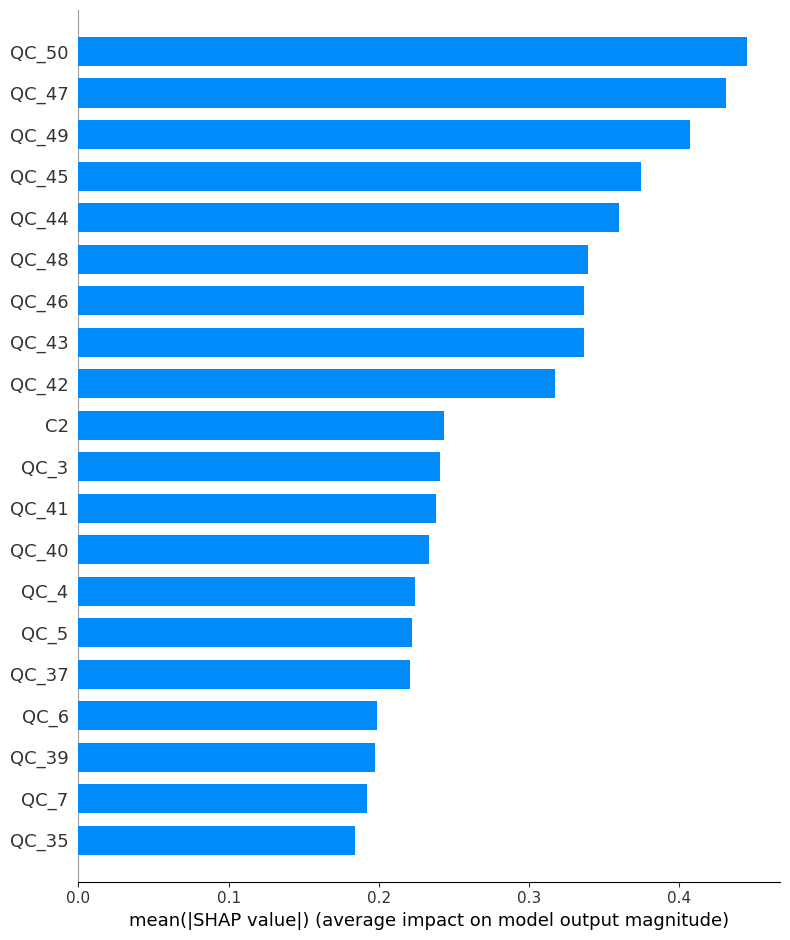

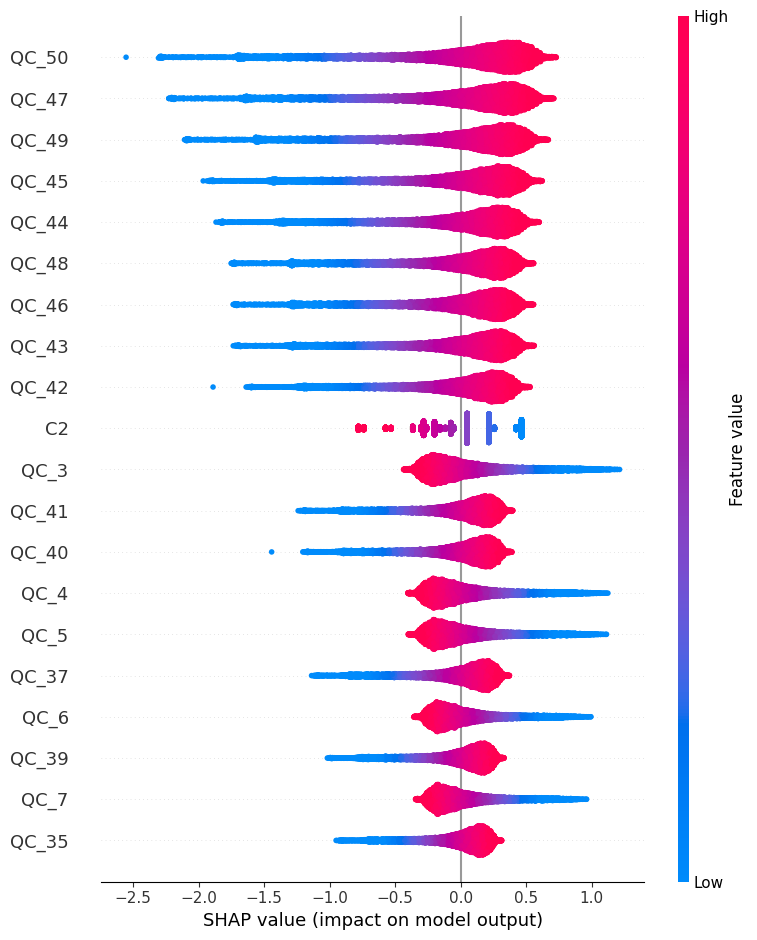

In [14]:
# explicabilité 

import shap
import matplotlib.pyplot as plt
import numpy as np

# Exemple d'utilisation de SHAP pour Ridge Regression
best_model_filename = f"Models/Ridge Regression_{taille_fenetre_to_run}w_{taille_stride_to_run}s_{best_fold_ridge_regression}fold.pkl"
best_model = pickle.load(open(best_model_filename, "rb"))

# Créer un explainer SHAP
explainer = shap.Explainer(best_model, X_np_binary) # là on utilise tout le jeu de données ?
shap_values = explainer(X_np_binary)

# Explication globale : importance des features
shap.summary_plot(shap_values, X_np_binary, plot_type="bar", feature_names=features_binary)  # Importance moyenne des features
shap.summary_plot(shap_values, X_np_binary, feature_names=features_binary)  # Distribution des contributions des features

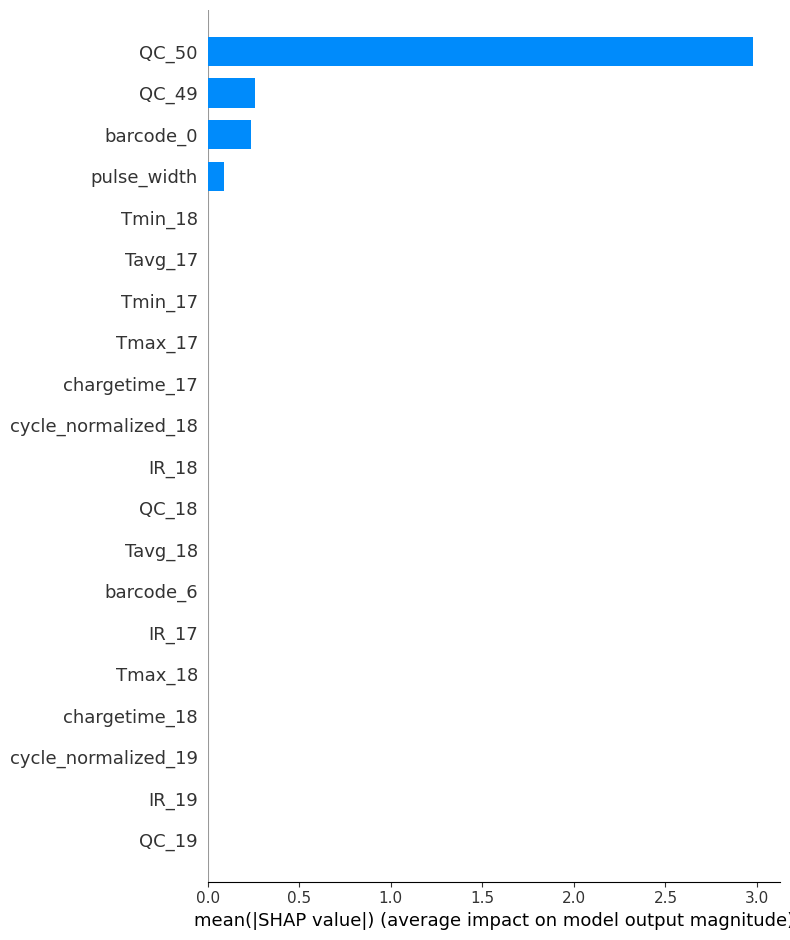

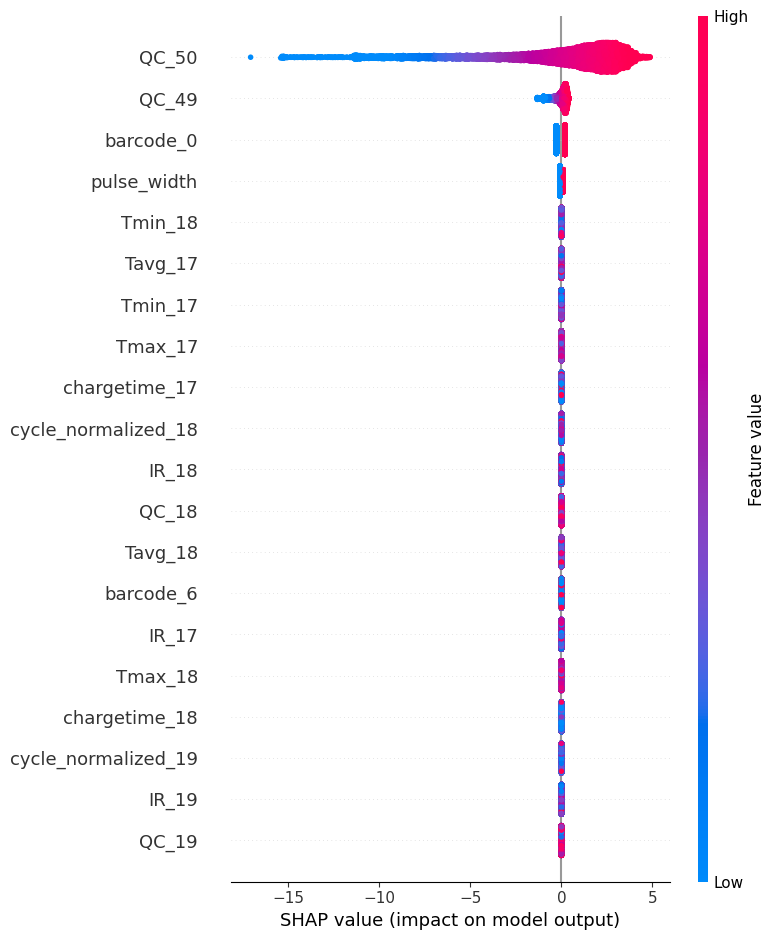

In [15]:
# Exemple d'utilisation de SHAP pour Lasso Regression
best_model_filename = f"Models/Lasso Regression_{taille_fenetre_to_run}w_{taille_stride_to_run}s_{best_fold_lasso_regression}fold.pkl"
best_model = pickle.load(open(best_model_filename, "rb"))

explainer = shap.Explainer(best_model, X_np_binary) # là on utilise tout le jeu de données ?
shap_values = explainer(X_np_binary)

shap.summary_plot(shap_values, X_np_binary, plot_type="bar", feature_names=features_binary) 
shap.summary_plot(shap_values, X_np_binary, feature_names=features_binary) 

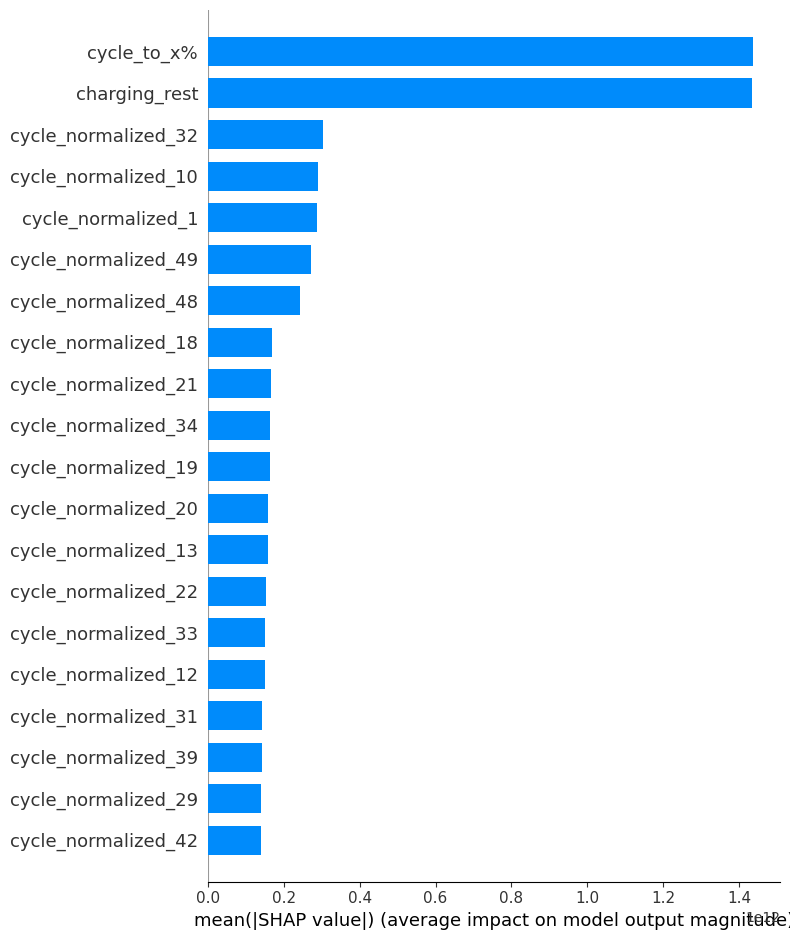

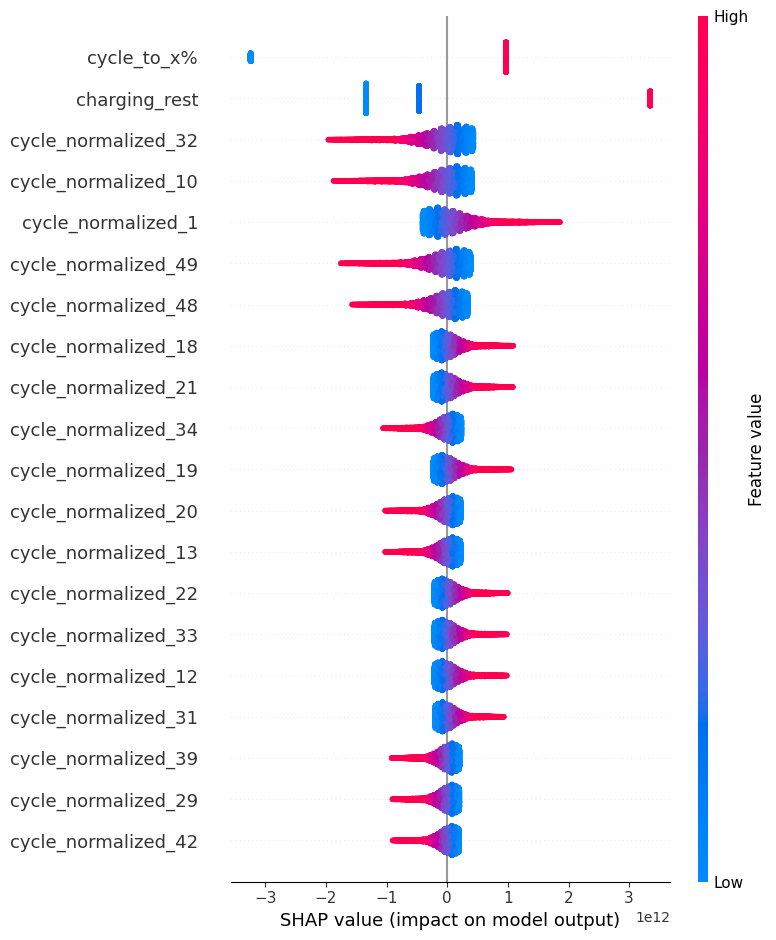

In [16]:
# Exemple d'utilisation de SHAP pour Linear Regression
best_model_filename = f"Models/Linear Regression_{taille_fenetre_to_run}w_{taille_stride_to_run}s_{best_fold_linear_regression}fold.pkl"
best_model = pickle.load(open(best_model_filename, "rb"))

explainer = shap.Explainer(best_model, X_np_binary) # là on utilise tout le jeu de données ?
shap_values = explainer(X_np_binary)

shap.summary_plot(shap_values, X_np_binary, plot_type="bar", feature_names=features_binary) 
shap.summary_plot(shap_values, X_np_binary, feature_names=features_binary) 

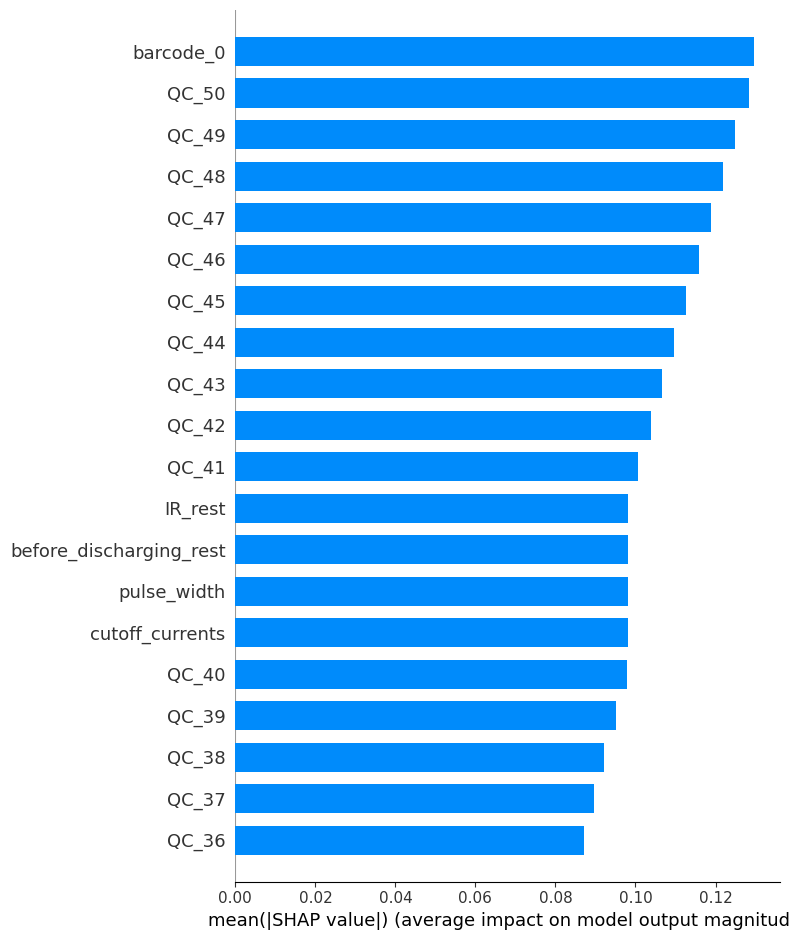

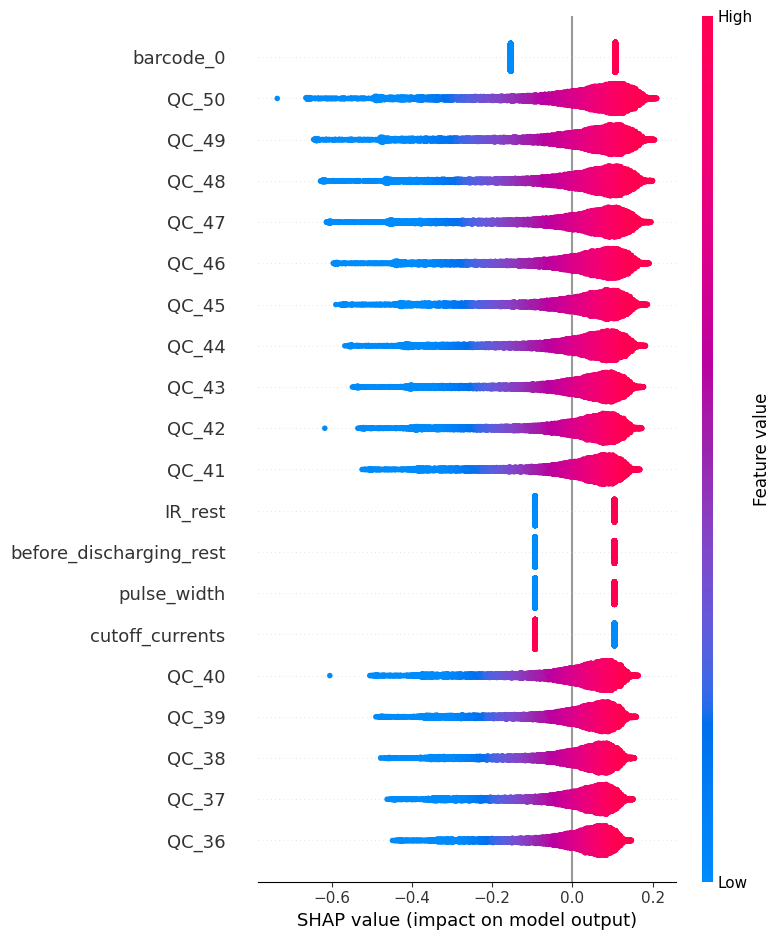

In [18]:
# Exemple d'utilisation de SHAP pour Elastic Net Regression
best_model_filename = f"Models/Elastic Net Regression_{taille_fenetre_to_run}w_{taille_stride_to_run}s_{best_fold_elastic_net_regression}fold.pkl"
best_model = pickle.load(open(best_model_filename, "rb"))

explainer = shap.Explainer(best_model, X_np_binary) # là on utilise tout le jeu de données ?
shap_values = explainer(X_np_binary)

shap.summary_plot(shap_values, X_np_binary, plot_type="bar", feature_names=features_binary) 
shap.summary_plot(shap_values, X_np_binary, feature_names=features_binary) 